# Code to visualize ElasticNet regression coefficients from the prediction of TMI from rs-fMRI data and covariates
Code by Ilkka Suuronen; adapted by Isabella L.C. Mariani Wigley and Aurora Berto for PONS project (06 / 2025)

ilksuu@utu.fi; ilmawi@utu.fi; aurber@utu.fi

In [1]:
import pickle
import numpy as np
import pandas as pd
import os
import re

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.cm

In [2]:
cwd = os.getcwd() # get current working directory

cwd

'/Users/auroraberto/Desktop/24-25/MSc_thesis/main_article/elasticNet'

In [3]:
parent = os.path.abspath(cwd)
model_article_dir = os.path.abspath(os.path.join(parent, os.pardir))
pons_root = os.path.abspath(os.path.join(model_article_dir, os.pardir))

parent

'/Users/auroraberto/Desktop/24-25/MSc_thesis/main_article/elasticNet'

In [4]:
pickles_dir = parent + "/pickles/"

pickles_dir

'/Users/auroraberto/Desktop/24-25/MSc_thesis/main_article/elasticNet/pickles/'

In [5]:
# open pickled results
# original dataset
# with open(os.path.join(os.getcwd(), pickles_dir + 'rsfmri_reg_all_orig.pkl'), 'rb') as file:
#    data = pickle.load(file)

# harmonized dataset
with open(os.path.join(os.getcwd(), pickles_dir + 'rsfmri_reg_all.pkl'), 'rb') as file:
    data = pickle.load(file)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.4.2 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.4.2 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.4.2 when using version 1.7.0. This might lead to breaking code

In [6]:
# get feature names as seen in the first CV iteration
fnames = data["estimator"][0][-1].feature_names_in_

# dataframe for storing coefficient per cv fold
cv_coefs = pd.DataFrame(columns=fnames)

cv_coefs

,interview_age,pubertal_developmental_scale,rsfmri_c_ngd_ad_ngd_ad,rsfmri_c_ngd_ad_ngd_cgc,rsfmri_c_ngd_ad_ngd_ca,rsfmri_c_ngd_ad_ngd_dt,rsfmri_c_ngd_ad_ngd_dla,rsfmri_c_ngd_ad_ngd_fo,rsfmri_c_ngd_ad_ngd_n,rsfmri_c_ngd_ad_ngd_rspltp,...,mri_info_deviceserialnumber_HASHb640a1b8,mri_info_deviceserialnumber_HASHc3bf3d9c,mri_info_deviceserialnumber_HASHc9398971,mri_info_deviceserialnumber_HASHd422be27,mri_info_deviceserialnumber_HASHd7cb4c6d,mri_info_deviceserialnumber_HASHdb2589d4,mri_info_deviceserialnumber_HASHe3ce02d3,mri_info_deviceserialnumber_HASHe4f6957a,mri_info_deviceserialnumber_HASHe76e6d72,mri_info_deviceserialnumber_HASHfeb7e81a


In [7]:
n_folds = len(data["estimator"]) 

for i in range(n_folds):
    cv_coefs.loc[i] = data["estimator"][i][-1].coef_ 

cv_coefs

,interview_age,pubertal_developmental_scale,rsfmri_c_ngd_ad_ngd_ad,rsfmri_c_ngd_ad_ngd_cgc,rsfmri_c_ngd_ad_ngd_ca,rsfmri_c_ngd_ad_ngd_dt,rsfmri_c_ngd_ad_ngd_dla,rsfmri_c_ngd_ad_ngd_fo,rsfmri_c_ngd_ad_ngd_n,rsfmri_c_ngd_ad_ngd_rspltp,...,mri_info_deviceserialnumber_HASHb640a1b8,mri_info_deviceserialnumber_HASHc3bf3d9c,mri_info_deviceserialnumber_HASHc9398971,mri_info_deviceserialnumber_HASHd422be27,mri_info_deviceserialnumber_HASHd7cb4c6d,mri_info_deviceserialnumber_HASHdb2589d4,mri_info_deviceserialnumber_HASHe3ce02d3,mri_info_deviceserialnumber_HASHe4f6957a,mri_info_deviceserialnumber_HASHe76e6d72,mri_info_deviceserialnumber_HASHfeb7e81a
0,-0.024033,0.307360,0.0,0.0,-0.000953,-0.0,-0.0,-0.048207,-0.0,0.0,...,0.096009,0.0,-0.0,-0.0,0.008587,0.038135,-0.00000,-0.054636,0.0,0.000000
1,-0.000000,0.304654,0.0,0.0,-0.011511,-0.0,0.0,-0.000000,-0.0,0.0,...,0.057436,0.0,-0.0,-0.0,0.000246,0.040992,-0.00000,-0.037249,0.0,0.050801
2,-0.013769,0.313298,0.0,0.0,-0.022833,-0.0,0.0,-0.000000,-0.0,0.0,...,0.058920,0.0,-0.0,-0.0,0.000000,0.000000,-0.00000,-0.024524,0.0,0.046761
3,-0.000000,0.327570,0.0,0.0,-0.000000,-0.0,0.0,-0.000000,-0.0,0.0,...,0.083241,0.0,-0.0,-0.0,0.006867,0.037754,-0.03089,-0.024132,-0.0,0.026517
4,-0.000000,0.273287,0.0,0.0,-0.000000,-0.0,0.0,-0.000000,-0.0,0.0,...,0.091299,0.0,0.0,0.0,0.018920,0.000000,-0.00000,-0.010674,0.0,0.032110


In [8]:
# get non-imaging feature names
# r = re.compile("ehi_y_ss_scoreb_*|demo_sex_*|race_*|mri_info_deviceserialnumber_*")
# cat_dummies = list(filter(r.match, fnames))
# non_img_feats = ["interview_age", "pubertal_developmental_scale"] + cat_dummies

In [9]:
# cv_coefs = cv_coefs[non_img_feats]

# cv_coefs

In [10]:
# order the columns based on mean value

cv_coefs_means = cv_coefs.mean(axis=0)
cv_coefs_means = cv_coefs_means.sort_values(ascending=False)
ordering = cv_coefs_means.index

cv_coefs_ordered = cv_coefs[ordering]
cv_coefs_ordered

,pubertal_developmental_scale,TR_K20_C19x1,TR_K20_C7x8,mri_info_deviceserialnumber_HASH7911780b,TR_K18_C5x2,TR_K20_C1x6,TR_K17_C5x8,TR_K18_C3x6,TR_K20_C4x2,TR_K20_C5x7,...,TR_K15_C2x1,TR_K18_C6x3,mri_info_deviceserialnumber_HASH1314a204,TR_K20_C15x1,TR_K16_C2x3,rsfmri_c_ngd_sa_ngd_sa,TR_K19_C10x3,TR_K19_C7x8,race_ethnicity_1.0,TR_K17_C3x5
0,0.307360,0.216599,0.160414,0.103094,0.154995,0.057411,0.068641,0.107592,0.090112,0.100151,...,-0.072074,-0.092929,-0.097524,-0.043118,-0.017354,-0.139711,-0.126577,-0.161156,-0.300599,-0.355195
1,0.304654,0.204030,0.186491,0.181202,0.139218,0.087985,0.103451,0.080446,0.091644,0.078850,...,-0.090072,-0.093511,-0.098116,-0.110978,-0.083901,-0.137132,-0.139012,-0.159557,-0.255361,-0.320699
2,0.313298,0.215768,0.196807,0.187697,0.114265,0.108512,0.089569,0.130419,0.091558,0.053365,...,-0.070616,-0.125012,-0.092717,-0.114867,-0.137594,-0.119467,-0.137731,-0.154274,-0.196482,-0.329564
3,0.327570,0.233541,0.209423,0.192217,0.216345,0.111596,0.122444,0.054566,0.058166,0.135172,...,-0.125475,-0.095941,-0.099133,-0.159424,-0.203521,-0.159435,-0.128356,-0.193122,-0.351864,-0.462611
4,0.273287,0.156104,0.126884,0.200837,0.043788,0.146970,0.100025,0.071599,0.111989,0.028224,...,-0.087573,-0.085384,-0.108086,-0.104755,-0.136020,-0.127976,-0.163264,-0.184924,-0.294122,-0.315960


In [11]:
# take the first 10 variables (+)
top10_cols = cv_coefs_ordered.columns[:10]

# take the first 10 variables (-)
bottom10_cols = cv_coefs_ordered.columns[-10:]

# merge the two lists
selected_cols = top10_cols.tolist() + bottom10_cols.tolist()
cv_coefs_selected = cv_coefs_ordered[selected_cols]


In [12]:
print(type(cv_coefs_selected))

<class 'pandas.core.frame.DataFrame'>


In [13]:
cv_coefs_selected

,pubertal_developmental_scale,TR_K20_C19x1,TR_K20_C7x8,mri_info_deviceserialnumber_HASH7911780b,TR_K18_C5x2,TR_K20_C1x6,TR_K17_C5x8,TR_K18_C3x6,TR_K20_C4x2,TR_K20_C5x7,TR_K15_C2x1,TR_K18_C6x3,mri_info_deviceserialnumber_HASH1314a204,TR_K20_C15x1,TR_K16_C2x3,rsfmri_c_ngd_sa_ngd_sa,TR_K19_C10x3,TR_K19_C7x8,race_ethnicity_1.0,TR_K17_C3x5
0,0.307360,0.216599,0.160414,0.103094,0.154995,0.057411,0.068641,0.107592,0.090112,0.100151,-0.072074,-0.092929,-0.097524,-0.043118,-0.017354,-0.139711,-0.126577,-0.161156,-0.300599,-0.355195
1,0.304654,0.204030,0.186491,0.181202,0.139218,0.087985,0.103451,0.080446,0.091644,0.078850,-0.090072,-0.093511,-0.098116,-0.110978,-0.083901,-0.137132,-0.139012,-0.159557,-0.255361,-0.320699
2,0.313298,0.215768,0.196807,0.187697,0.114265,0.108512,0.089569,0.130419,0.091558,0.053365,-0.070616,-0.125012,-0.092717,-0.114867,-0.137594,-0.119467,-0.137731,-0.154274,-0.196482,-0.329564
3,0.327570,0.233541,0.209423,0.192217,0.216345,0.111596,0.122444,0.054566,0.058166,0.135172,-0.125475,-0.095941,-0.099133,-0.159424,-0.203521,-0.159435,-0.128356,-0.193122,-0.351864,-0.462611
4,0.273287,0.156104,0.126884,0.200837,0.043788,0.146970,0.100025,0.071599,0.111989,0.028224,-0.087573,-0.085384,-0.108086,-0.104755,-0.136020,-0.127976,-0.163264,-0.184924,-0.294122,-0.315960


In [14]:
# Rename variables names (harmonized)
# rename_dict = {
#     "pubertal_developmental_scale": "Pubertal Developmental Scale",
#     "mri_info_deviceserialnumber_HASH7911780b": "MRI device - s.n. HASH7911780b",
#     "race_ethnicity_3.0": "Ethnicity - hispanic",
#     "TR_K15_C13x14": "Transition - from 13 to 14 (K=15)",
#     "mri_info_deviceserialnumber_HASHb640a1b8": "MRI device - s.n. HASHb640a1b8",
#     "TR_K18_C6x4": "Transition - from 6 to 4 (K=18)",
#     "TR_K17_C5x3": "Transition - from 5 to 3 (K=17)",
#     "rsfmri_cor_ngd_au_scs_vtdcrh": "Gordon rsFC - Auditory SCS (RH)",
#     "TR_K19_C13x12": "Transition - from 13 to 12 (K=19)",
#     "TR_K19_C17x9": "Transition - from 17 to 9 (K=19)",
#     "rsfmri_cor_ngd_smh_scs_pllh": "Gordon rsFC - SMH SCS (LH)",
#     "rsfmri_cor_ngd_au_scs_vtdclh": "Gordon rsFC - AU SCS (LH)",
#     "rsfmri_cor_ngd_vs_scs_hplh": "Gordon rsFC - VIS SCS (LH)",
#     "rsfmri_cor_ngd_rst_scs_hplh": "Gordon rsFC - RST SCS (LH)",
#     "rsfmri_c_ngd_dt_ngd_vta": "Gordon rsFC - DAN VAN",
#     "rsfmri_cor_ngd_cerc_scs_agrh": "Gordon rsFC - CERC SCS (RH)",
#     "mri_info_deviceserialnumber_HASH1314a204": "MRI device - s.n. HASH1314a204",
#     "rsfmri_cor_ngd_cerc_scs_aglh": "Gordon rsFC - CERC SCS (LH)",
#     "rsfmri_c_ngd_sa_ngd_sa": "Gordon rsFC - intra SA",
#     "race_ethnicity_1.0": "Ethnicity - white"
# }

# Rename variables names (harmonized)
rename_dict = {
    "pubertal_developmental_scale": "Pubertal Developmental Scale",
    "TR_K20_C19x1": "Transition - from 19 to 1 (K=20)",
    "TR_K20_C7x8":  "Transition - from 7 to 8 (K=20)",
    "mri_info_deviceserialnumber_HASH7911780b": "MRI device - s.n. HASH7911780b",
    "TR_K18_C5x2": "Transition - from 5 to 2 (K=18)",
    "TR_K20_C1x6": "Transition - from 1 to 6 (K=20)",
    "TR_K17_C5x8": "Transition - from 5 to (K=17)",
    "TR_K18_C3x6": "Transition - from 3 to 6 (K=18)",
    "TR_K20_C4x2": "Transition - from 4 to 2 (K=20)",
    "TR_K20_C5x7": "Transition - from 5 to 7 (K=20)",
    "TR_K15_C2x1": "Transition - from 2 to 1 (K=15)",
    "TR_K18_C6x3": "Transition - from 6 to 3 (K=18)",
    "mri_info_deviceserialnumber_HASH1314a204": "MRI device - s.n. HASH1314a204",
    "TR_K20_C15x1": "Transition - from 15 to 1 (K=20)",
    "TR_K16_C2x3": "Transition - from 2 to 3 (K=16)",
    "rsfmri_c_ngd_sa_ngd_sa": "Gordon rsFC - intra SA",
    "TR_K19_C10x3": "Transition - from 10 to 3 (K=19)",
    "TR_K19_C7x8": "Transition - from 7 to 8 (K=19)",
    "race_ethnicity_1.0": "Ethnicity - white",
    "TR_K17_C3x5": "Transition - from 3 to  (K=17)"
}

In [15]:
cv_coefs_selected = cv_coefs_selected.rename(columns = rename_dict)


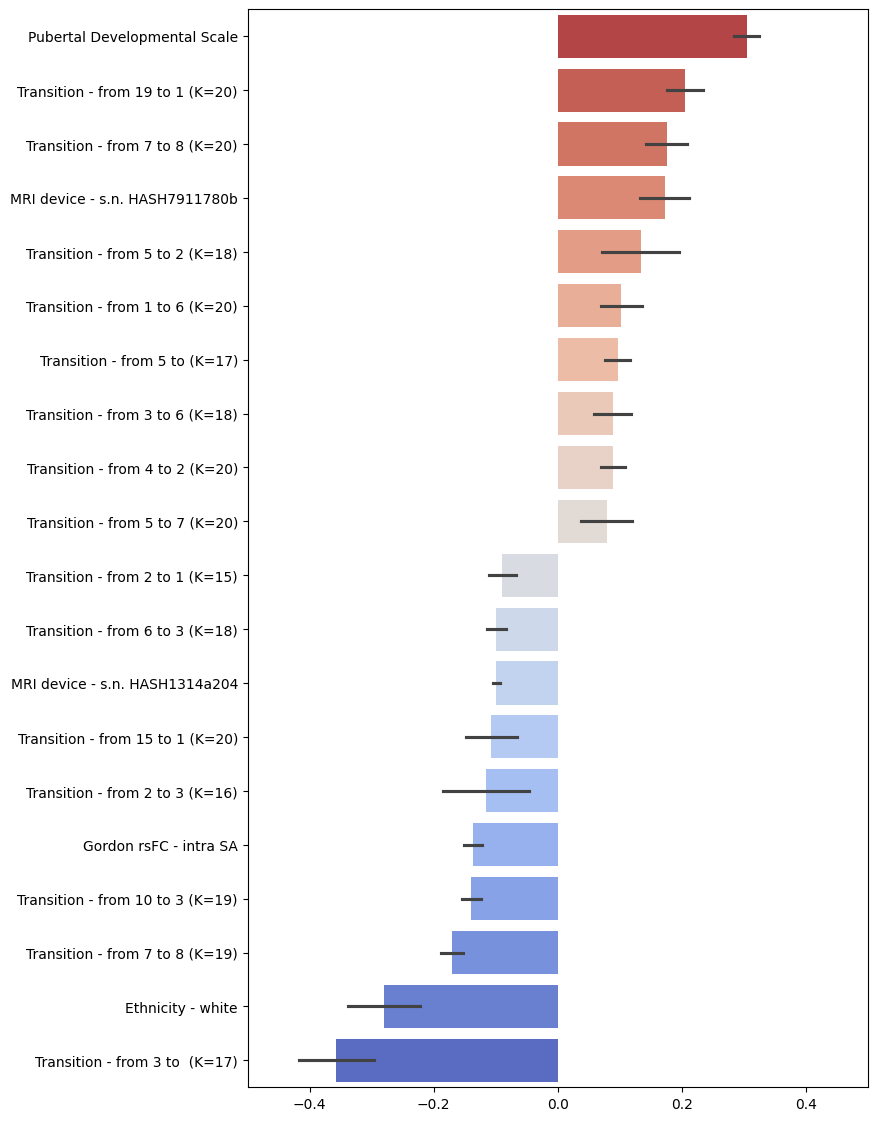

In [16]:
# use seaborn to plot, use estimator and errorbar to compute statistics

fig = plt.figure(figsize=(8, 14))

sns.barplot(cv_coefs_selected, estimator=np.mean, errorbar="sd", orient="h",
            palette="coolwarm_r")
plt.xlim(-0.5, 0.5)
plt.show()